In [1]:
import pandas
import datetime
import numpy as np
from matplotlib.pyplot import (figure, plot, title, xlabel, ylabel, 
                               colorbar, imshow, xticks, yticks, show, style, scatter, subplots, savefig)
import geopy.distance
import utm
import simplekml

style.use('seaborn-darkgrid')

In [2]:
SONAR_DATASET = "./csv/Gudenavej_near_boat.csv"
GPS_RTK_DATASET = "./csv/guden_a_WITH_time_stamp.csv"

In [3]:
sonar_raw_df = pandas.read_csv(SONAR_DATASET)

In [4]:
sonar_raw_df.columns = ["lat", "long", "deep", "timestamp"]
print(sonar_raw_df.head())

   lat  long   deep      timestamp
0  0.0   0.0  1.396  1581667612274
1  0.0   0.0  1.396  1581667612318
2  0.0   0.0  1.396  1581667612318
3  0.0   0.0  1.396  1581667612318
4  0.0   0.0  1.396  1581667612636


In [5]:
sonar_raw_df['datetime'] = (list(map(lambda x: datetime.datetime.fromtimestamp(x / 1e3), sonar_raw_df['timestamp'].astype(int))))
print(sonar_raw_df.head())



   lat  long   deep      timestamp                datetime
0  0.0   0.0  1.396  1581667612274 2020-02-14 09:06:52.274
1  0.0   0.0  1.396  1581667612318 2020-02-14 09:06:52.318
2  0.0   0.0  1.396  1581667612318 2020-02-14 09:06:52.318
3  0.0   0.0  1.396  1581667612318 2020-02-14 09:06:52.318
4  0.0   0.0  1.396  1581667612636 2020-02-14 09:06:52.636


In [6]:
sonar_df = pandas.DataFrame()
sonar_df['deep'] = sonar_raw_df['deep']
sonar_df['date'] = (list(map (lambda x: x.date(), sonar_raw_df['datetime'])))
sonar_df['time'] = (list(map (lambda x: x.time(), sonar_raw_df['datetime'])))
sonar_df['timestamp'] = sonar_raw_df['timestamp']
print(sonar_df.head())

    deep        date             time      timestamp
0  1.396  2020-02-14  09:06:52.274000  1581667612274
1  1.396  2020-02-14  09:06:52.318000  1581667612318
2  1.396  2020-02-14  09:06:52.318000  1581667612318
3  1.396  2020-02-14  09:06:52.318000  1581667612318
4  1.396  2020-02-14  09:06:52.636000  1581667612636


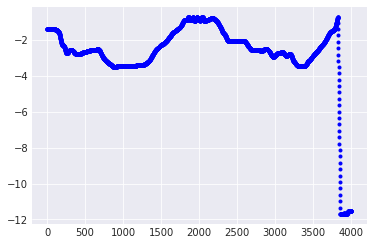

In [7]:
figure(0)
X = range(len(sonar_df['deep']))
plot(X, - sonar_df['deep'], ".b")
xlabel("")
show()

In [8]:
rtk_raw_df = pandas.read_csv(GPS_RTK_DATASET)
print(rtk_raw_df.head())

       Pt name        North        East  Elevation  HA  VA  SD      Time  \
0  wl_bathymry  6241422.827  540768.107     13.571 NaN NaN NaN  11:46:29   
1  wl_bathymrz  6241423.474  540767.285     13.546 NaN NaN NaN  11:46:52   
2  wl_bathymsa  6241423.504  540767.416     13.574 NaN NaN NaN  11:47:20   
3  wl_bathymsb  6241423.433  540767.385     13.548 NaN NaN NaN  11:47:31   
4  wl_bathymsc  6241424.967  540761.616     13.613 NaN NaN NaN  11:49:39   

         Date Code  
0  2020-02-13    1  
1  2020-02-13    1  
2  2020-02-13    2  
3  2020-02-13    2  
4  2020-02-13    3  


In [9]:
rtk_df = pandas.DataFrame()
rtk_df['Pt_name'] = rtk_raw_df['Pt name']
rtk_df["North"] = rtk_raw_df["North"]
rtk_df["East"] = rtk_raw_df["East"]
rtk_df["Time"]  = rtk_raw_df["Time"]
rtk_df["Date"] = rtk_raw_df["Date"]
print(rtk_df.head())

       Pt_name        North        East      Time        Date
0  wl_bathymry  6241422.827  540768.107  11:46:29  2020-02-13
1  wl_bathymrz  6241423.474  540767.285  11:46:52  2020-02-13
2  wl_bathymsa  6241423.504  540767.416  11:47:20  2020-02-13
3  wl_bathymsb  6241423.433  540767.385  11:47:31  2020-02-13
4  wl_bathymsc  6241424.967  540761.616  11:49:39  2020-02-13


In [10]:
# Creating a new dataframe is necessary to avoid future warning in processing the data
xs2_pole1 = pandas.DataFrame(rtk_df[rtk_df['Pt_name'] == "xs_gudenvek"])
xs2_pole2 = pandas.DataFrame(rtk_df[rtk_df['Pt_name'] == "xs_gudenvej"])

In [11]:
series_of_points = rtk_df.Pt_name.str.match(r'snr_gudenvej[0-9]*')
print(series_of_points.head())

0    False
1    False
2    False
3    False
4    False
Name: Pt_name, dtype: bool


In [12]:
narrowed_rtk_df = rtk_df[series_of_points]
print(narrowed_rtk_df.head())

           Pt_name        North        East      Time        Date
174  snr_gudenvej1  6247648.305  540373.085  09:15:24  2020-02-14
175  snr_gudenvej2  6247648.224  540373.132  09:15:25  2020-02-14
176  snr_gudenvej3  6247648.087  540373.105  09:15:26  2020-02-14
177  snr_gudenvej4  6247647.835  540373.108  09:15:27  2020-02-14
178  snr_gudenvej5  6247647.706  540373.135  09:15:28  2020-02-14


In [13]:
gudenavej_rtk_df = pandas.DataFrame(rtk_df[series_of_points])
print(gudenavej_rtk_df.head())

           Pt_name        North        East      Time        Date
174  snr_gudenvej1  6247648.305  540373.085  09:15:24  2020-02-14
175  snr_gudenvej2  6247648.224  540373.132  09:15:25  2020-02-14
176  snr_gudenvej3  6247648.087  540373.105  09:15:26  2020-02-14
177  snr_gudenvej4  6247647.835  540373.108  09:15:27  2020-02-14
178  snr_gudenvej5  6247647.706  540373.135  09:15:28  2020-02-14


In [14]:
xs2_pole1_latlong = utm.to_latlon(float(xs2_pole1['East']),
                                   float(xs2_pole1['North']), 32, 'U')

xs2_pole2_latlong = utm.to_latlon(float(xs2_pole2['East']),
                                   float(xs2_pole2['North']), 32, 'U')

xs2_pole1['Lat'] = xs2_pole1_latlong[0]
xs2_pole1['Long'] = xs2_pole1_latlong[1]

xs2_pole2['Lat'] = xs2_pole2_latlong[0]
xs2_pole2['Long'] = xs2_pole2_latlong[1]

latlong = np.matrix([utm.to_latlon(float(gudenavej_rtk_df['East'].values[x]),
                                   float(gudenavej_rtk_df['North'].values[x]), 32, 'U')
                     for x in range(len(gudenavej_rtk_df))])
gudenavej_rtk_df['Lat'] = latlong[:, 0]
gudenavej_rtk_df['Long'] = latlong[:, 1]
print(gudenavej_rtk_df.head())

           Pt_name        North        East      Time        Date        Lat  \
174  snr_gudenvej1  6247648.305  540373.085  09:15:24  2020-02-14  56.371758   
175  snr_gudenvej2  6247648.224  540373.132  09:15:25  2020-02-14  56.371758   
176  snr_gudenvej3  6247648.087  540373.105  09:15:26  2020-02-14  56.371757   
177  snr_gudenvej4  6247647.835  540373.108  09:15:27  2020-02-14  56.371754   
178  snr_gudenvej5  6247647.706  540373.135  09:15:28  2020-02-14  56.371753   

         Long  
174  9.653632  
175  9.653633  
176  9.653632  
177  9.653632  
178  9.653633  


In [15]:
from pathlib import Path
Path("./kml").mkdir(parents=True, exist_ok=True)

In [16]:
kml = simplekml.Kml()
style = simplekml.Style()
style.labelstyle.scale = 0 # set the label scale to 0 in order to not show the label in the maps
style.iconstyle.icon.href = 'http://maps.google.com/mapfiles/kml/shapes/placemark_circle.png'
style.iconstyle.scale = 0.5
style.iconstyle.color = simplekml.Color.yellow

for x in range(len(gudenavej_rtk_df)):
    pnt = kml.newpoint(name="Pt_name " + str(x + 1))
    coord = [(gudenavej_rtk_df['Long'].values[x], gudenavej_rtk_df['Lat'].values[x])]
    pnt.coords = [(gudenavej_rtk_df['Long'].values[x], gudenavej_rtk_df['Lat'].values[x])]
    pnt.style = style

kml.save("kml/GudenvejAllRtkPoints.kml")

In [17]:
start_mark = (gudenavej_rtk_df['Long'].values[0], gudenavej_rtk_df['Lat'].values[0])
end_mark = (gudenavej_rtk_df['Long'].values[-1], gudenavej_rtk_df['Lat'].values[-1])

xs2_pole1_mark = (xs2_pole1['Long'].values[0], xs2_pole1['Lat'].values[0])
xs2_pole2_mark = (xs2_pole2['Long'].values[0], xs2_pole2['Lat'].values[0])

In [18]:
kml = simplekml.Kml()
style1 = simplekml.Style()
style1.labelstyle.color = "ffa3a097"
style1.labelstyle.scale = 2
style1.iconstyle.icon.href = 'http://maps.google.com/mapfiles/kml/pushpin/ylw-pushpin.png'

start_mark = (gudenavej_rtk_df['Long'].values[0], gudenavej_rtk_df['Lat'].values[0])
end_mark = (gudenavej_rtk_df['Long'].values[-1], gudenavej_rtk_df['Lat'].values[-1])

pnt = kml.newpoint(name='Gudenavej First Point')
pnt.coords = [start_mark]
pnt.style = style1
pnt = kml.newpoint(name='Gudenavej Last Point')
pnt.coords = [end_mark]
pnt.style = style1

style2 = simplekml.Style()
style2.labelstyle.color = "ffa3a097"
style2.labelstyle.scale = 3
style2.iconstyle.icon.href = 'http://maps.google.com/mapfiles/kml/pushpin/red-pushpin.png'

pnt = kml.newpoint(name='xs2_pole1')
pnt.coords = [xs2_pole1_mark]
pnt.style = style2
pnt = kml.newpoint(name='xs2_pole2')
pnt.coords = [xs2_pole2_mark]
pnt.style = style2

ls = kml.newlinestring(name='Bathymetry section')
ls.coords = [start_mark, end_mark]
ls.extrude = 1
ls.altitudemode = simplekml.AltitudeMode.relativetoground
ls.style.linestyle.width = 1
ls.style.linestyle.color = "ffa4a83a"

ls1 = kml.newlinestring(name='Bathymetry section')
ls1.coords = [xs2_pole1_mark, xs2_pole2_mark]
ls1.extrude = 1
ls1.altitudemode = simplekml.AltitudeMode.relativetoground
ls1.style.linestyle.width = 5
ls1.style.linestyle.color = simplekml.Color.blue

kml.save("kml/GudenVejSection.kml")

In [19]:
timestamps = [datetime.datetime.strptime(gudenavej_rtk_df['Date'].values[x] + " " \
                                         + gudenavej_rtk_df['Time'].values[x], "%Y-%m-%d %H:%M:%S").timestamp()
                                         for x in range(len(gudenavej_rtk_df))]
gudenavej_rtk_df['Timestamp'] = timestamps
gudenavej_rtk_df.reset_index()
print(gudenavej_rtk_df.head())

           Pt_name        North        East      Time        Date        Lat  \
174  snr_gudenvej1  6247648.305  540373.085  09:15:24  2020-02-14  56.371758   
175  snr_gudenvej2  6247648.224  540373.132  09:15:25  2020-02-14  56.371758   
176  snr_gudenvej3  6247648.087  540373.105  09:15:26  2020-02-14  56.371757   
177  snr_gudenvej4  6247647.835  540373.108  09:15:27  2020-02-14  56.371754   
178  snr_gudenvej5  6247647.706  540373.135  09:15:28  2020-02-14  56.371753   

         Long     Timestamp  
174  9.653632  1.581668e+09  
175  9.653633  1.581668e+09  
176  9.653632  1.581668e+09  
177  9.653632  1.581668e+09  
178  9.653633  1.581668e+09  


In [20]:
timestamp_filter = ((sonar_df['timestamp'] < gudenavej_rtk_df['Timestamp'].values[-1] * 1e3) & \
                    (sonar_df['timestamp'] > gudenavej_rtk_df['Timestamp'].values[0] * 1e3))


In [21]:

sonar_rtk_df = pandas.DataFrame(sonar_df[timestamp_filter])
sonar_rtk_df.reset_index()
print(sonar_rtk_df.head())

       deep        date             time      timestamp
2048  0.711  2020-02-14  09:15:47.473000  1581668147473
2049  0.711  2020-02-14  09:15:47.477000  1581668147477
2050  0.711  2020-02-14  09:15:47.586000  1581668147586
2051  0.711  2020-02-14  09:15:47.586000  1581668147586
2052  0.739  2020-02-14  09:15:47.793000  1581668147793


In [22]:
euclidean_dist_point_1_116 = np.sqrt((gudenavej_rtk_df['North'].values[0] - gudenavej_rtk_df['North'].values[-1])**2 + \
                         (gudenavej_rtk_df['East'].values[0] - gudenavej_rtk_df['East'].values[-1])**2)
print(euclidean_dist_point_1_116)

34.85177115897428


In [23]:
coord_1 = (gudenavej_rtk_df['Lat'].values[0], gudenavej_rtk_df['Long'].values[0])
coord_116 = (gudenavej_rtk_df['Lat'].values[-1], gudenavej_rtk_df['Long'].values[-1])
distance_points_1_116 = geopy.distance.distance(coord_1, coord_116).m

distance_xs2_pole1_pole2 = geopy.distance.distance((xs2_pole1['Lat'].values[0], xs2_pole1['Long'].values[0]),
                                                 (xs2_pole2['Lat'].values[0], xs2_pole2['Long'].values[0])).m
print(distance_xs2_pole1_pole2)

40.66488519519008


In [24]:
sonar_rtk_df['unix_timestamp'] = [int(round(x / 1e3)) for x in sonar_rtk_df['timestamp'].values]

In [25]:
all_measure_per_points = [sonar_rtk_df[sonar_rtk_df['unix_timestamp'] == gudenavej_rtk_df['Timestamp'].values[x]].deep.values
                          for x in range(len(gudenavej_rtk_df))]
all_measure_per_points_clean = np.array([[np.nan] if x.size == 0 \
                                         else x for x in all_measure_per_points]) # convert all the empty array in an array conataining ['nan']
median_iter = map(lambda x: np.median(x), all_measure_per_points_clean)
gudenavej_rtk_df['Bathymetry'] = np.fromiter(median_iter, dtype=np.float)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
x = sonar_rtk_df['unix_timestamp'].values.reshape(-1, 1)
model.fit(x, list(range(len(sonar_rtk_df["unix_timestamp"].values))))
predicted = model.predict(gudenavej_rtk_df['Timestamp'].values.reshape(-1, 1))
bathymetry_knn = []
for item in predicted:
    bathymetry_knn.append(sonar_rtk_df['deep'].values[item])
gudenavej_rtk_df['Bathymetry_knn'] = bathymetry_knn


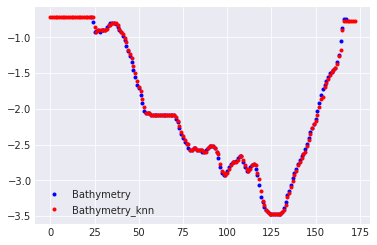

In [27]:
fig, ax = subplots()
X = range(len(gudenavej_rtk_df))
plot(X, - gudenavej_rtk_df['Bathymetry'].values, '.b', label="Bathymetry")
plot(X, - gudenavej_rtk_df['Bathymetry_knn'].values, '.r', label='Bathymetry_knn')
ax.legend()
xlabel("")
show()
fig.savefig('plot/gudenvejapprox.svg', format='svg')

In [28]:
gudenavej_rtk_df['Distance'] = [geopy.distance.distance(coord_1, (gudenavej_rtk_df['Lat'].values[x], gudenavej_rtk_df['Long'].values[x])).m 
                              for x in range(len(gudenavej_rtk_df))]
print(gudenavej_rtk_df.head())

           Pt_name        North        East      Time        Date        Lat  \
174  snr_gudenvej1  6247648.305  540373.085  09:15:24  2020-02-14  56.371758   
175  snr_gudenvej2  6247648.224  540373.132  09:15:25  2020-02-14  56.371758   
176  snr_gudenvej3  6247648.087  540373.105  09:15:26  2020-02-14  56.371757   
177  snr_gudenvej4  6247647.835  540373.108  09:15:27  2020-02-14  56.371754   
178  snr_gudenvej5  6247647.706  540373.135  09:15:28  2020-02-14  56.371753   

         Long     Timestamp  Bathymetry  Bathymetry_knn  Distance  
174  9.653632  1.581668e+09         NaN           0.711  0.000000  
175  9.653633  1.581668e+09         NaN           0.711  0.093684  
176  9.653632  1.581668e+09         NaN           0.711  0.218999  
177  9.653632  1.581668e+09         NaN           0.711  0.470741  
178  9.653633  1.581668e+09         NaN           0.711  0.601312  


### Distance Plotting

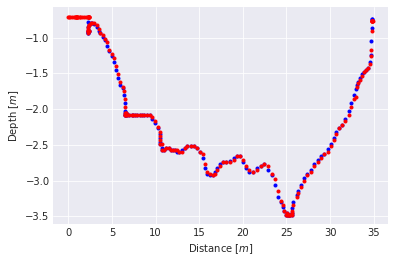

In [29]:
figure(1)
X = range(len(gudenavej_rtk_df))
plot(gudenavej_rtk_df['Distance'], - gudenavej_rtk_df['Bathymetry'].values, '.b')
plot(gudenavej_rtk_df['Distance'], - gudenavej_rtk_df['Bathymetry_knn'].values, '.r')
xlabel("Distance [$m$]")
ylabel("Depth [$m$]")
show()

In [30]:
dy = float(xs2_pole1['North'].values[0]) - float(xs2_pole2['North'].values[0])
dx = float(xs2_pole1['East'].values[0]) - float(xs2_pole2['East'].values[0])
m = np.float(dy)/np.float(dx)


In [31]:
dx1 = np.sqrt(np.power(np.float(0.1), 2)/((m)**2 + 1.0))
print(dx1)
dy1 = np.sqrt(np.power(np.float(0.1), 2) - dx1**2)
print(dy1)

0.003011112171160794
0.09995465573695249


In [32]:
sections_enu_coord = []

for i in range(int(distance_xs2_pole1_pole2 / 0.1)):
    sections_enu_coord.append((xs2_pole1['East'].values[0] - dx1 * i, xs2_pole1['North'].values[0] - dy1 * i))
sections_enu_coord = np.asarray(sections_enu_coord)

sections_utm_coord = np.asarray(list(map(lambda x: utm.to_latlon(x[0], x[1], 32, 'U'), sections_enu_coord)))

In [33]:
kml = simplekml.Kml()
style1.labelstyle.scale = 0 # set the label scale to 0 in order to not show the label in the maps
style1.iconstyle.icon.href = 'http://maps.google.com/mapfiles/kml/shapes/placemark_circle.png'
style1.iconstyle.scale = 0.5
style1.iconstyle.color = simplekml.Color.yellow

for x in range(len(sections_utm_coord)):
    pnt = kml.newpoint(name='Point' + str(x))
    pnt.coords = [np.flipud(sections_utm_coord[x])]
    pnt.style = style1

style2 = simplekml.Style()
style2.labelstyle.color = "ffa3a097"
style2.labelstyle.scale = 3
style2.iconstyle.icon.href = 'http://maps.google.com/mapfiles/kml/pushpin/red-pushpin.png'

pnt = kml.newpoint(name='xs2_pole1')
pnt.coords = [xs2_pole1_mark]
pnt.style = style2
pnt = kml.newpoint(name='xs2_pole2')
pnt.coords = [xs2_pole2_mark]
pnt.style = style2

kml.save("kml/divisions_gudenvej.kml")

<img src="imgs/Sections.png">

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
rtk_points = np.squeeze(np.dstack((gudenavej_rtk_df['East'].values, gudenavej_rtk_df['North'].values)))
bathymetry = np.full(len(sections_enu_coord), np.nan) 
bathymetry_knn = np.full(len(sections_enu_coord), np.nan) 
model.fit(sections_enu_coord, list(range(len(sections_enu_coord))))
predicted = model.predict(rtk_points)
for index in range(len(predicted)):
    bathymetry[predicted[index]] = gudenavej_rtk_df['Bathymetry'].values[index]
    bathymetry_knn[predicted[index]] = gudenavej_rtk_df['Bathymetry_knn'].values[index]


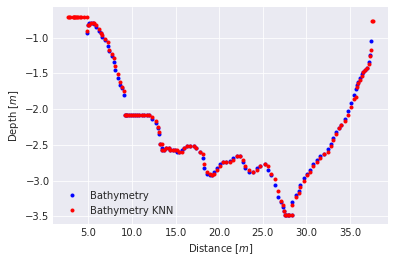

In [39]:
fig, ax = subplots()
X = range(len(sections_enu_coord))
plot(X, - np.asarray(bathimetry), '.b', label = "Bathymetry")
plot(X, - np.asarray(bathimetry_knn), '.r', label = "Bathymetry KNN")
labels=np.asarray(ax.get_xticks().tolist(), dtype=np.float) * 0.1
ax.set_xticklabels(labels)
ax.legend()
xlabel("Distance [$m$]")
ylabel("Depth [$m$]")
show()
fig.savefig('plot/gudenvej_projection.svg', format='svg')

In [44]:
from pathlib import Path
Path("./csv_results").mkdir(parents=True, exist_ok=True)

In [46]:
results = pandas.DataFrame()
results['Distance_in_m'] = [round(x * 0.1, 3) for x in range(len(bathymetry))]
results['Bathymetry'] = bathymetry
results['Bathymetry_KNN'] = bathymetry_knn
results['North'] = sections_enu_coord[:,1]
results['East'] = sections_enu_coord[:,0]
results['Lat'] = sections_utm_coord[:,0]
results['Long'] = sections_utm_coord[:,1]
results.to_csv("csv_results/Gudenavej_cross_section.csv",index=False)
gudenavej_rtk_df.to_csv("csv_results/Gudenavej_rtk_and_bathymetry.csv", index=False)